In [45]:
!pip install tensorflow keras

In [46]:
from tensorflow.python.keras.models import Sequential       #Sequential is the ANN architecture
from tensorflow.python.keras.layers import Dense            #The Layers in the ANN (Artificial Neural Network)
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [47]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
# Read CSV File from drive
import pandas as pd

drive_path = '/content/gdrive/My Drive/'
folder_path = 'ML/ALL/'

file_names_train = ['November_train.csv', 'December_train.csv', 'January_train.csv', 'February_train.csv', 'March_train.csv']
file_names_test = ['November_test.csv', 'December_test.csv', 'January_test.csv', 'February_test.csv', 'March_test.csv']

df_trains = []
df_tests = []

for i in range(0,5):
  df_train = pd.read_csv(drive_path+folder_path+file_names_train[i])
  df_test = pd.read_csv(drive_path+folder_path+file_names_test[i])
  
  df_trains.append(df_train)
  df_tests.append(df_test)

  print(df_train.shape)
  print(df_test.shape)
  


(27761, 10)
(1412, 16)
(58966, 10)
(1071, 16)
(95437, 10)
(1504, 16)
(120880, 10)
(1441, 16)
(150678, 10)
(1444, 12)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
print(len(df_trains), len(df_tests))

5 5


In [50]:
for X_train in df_trains:
  X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27761 entries, 0 to 27760
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               27761 non-null  int64  
 1   Clean Module Temperature (c)             27761 non-null  float64
 2   Dusty Module Temperature (c)             27761 non-null  float64
 3   Wind Speed (m/s)                         27761 non-null  float64
 4   Humidity (%)                             27761 non-null  float64
 5   Air Pressure (hPa)                       27761 non-null  float64
 6   Tr (Hour)                                27761 non-null  float64
 7   Clean Module Short Circuit Current (mA)  27761 non-null  float64
 8   Dusty Module Short Circuit Current (mA)  27761 non-null  float64
 9   T (Difference)                           27761 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.1 MB
<

In [51]:
for X_train in df_trains:
  X_train['Air Pressure (hPa)'] = pd.to_numeric(X_train['Air Pressure (hPa)'].astype(str), errors='coerce').fillna(0).astype(float)
  X_train['Clean Module Temperature (c)'] = pd.to_numeric(X_train['Clean Module Temperature (c)'].astype(str).str.replace('PM',''), errors='coerce').fillna(0).astype(float)

In [52]:
for X_train in df_trains:
  X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27761 entries, 0 to 27760
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               27761 non-null  int64  
 1   Clean Module Temperature (c)             27761 non-null  float64
 2   Dusty Module Temperature (c)             27761 non-null  float64
 3   Wind Speed (m/s)                         27761 non-null  float64
 4   Humidity (%)                             27761 non-null  float64
 5   Air Pressure (hPa)                       27761 non-null  float64
 6   Tr (Hour)                                27761 non-null  float64
 7   Clean Module Short Circuit Current (mA)  27761 non-null  float64
 8   Dusty Module Short Circuit Current (mA)  27761 non-null  float64
 9   T (Difference)                           27761 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.1 MB
<

In [53]:
sequential_model_clean = Sequential()

sequential_model_clean.add(Dense(7, activation='relu', input_dim=7))
sequential_model_clean.add(Dense(64, activation='selu'))
sequential_model_clean.add(Dropout(0.1))
sequential_model_clean.add(Dense(128, activation=LeakyReLU(alpha=0.05)))
sequential_model_clean.add(Dense(1, activation='selu'))
# Compile Sequential Model
sequential_model_clean.compile(
    optimizer = 'Adam', #Adam(lr=0.00001
    loss = 'mse',
    metrics=['accuracy']
)
sequential_model_dusty = sequential_model_clean

Epoch 1/100
278/278 [==============================] - 1s 2ms/step - loss: 190903.0000 - accuracy: 7.9248e-04 - val_loss: 69523.1641 - val_accuracy: 7.0822e-04
Epoch 2/100
278/278 [==============================] - 0s 2ms/step - loss: 32417.9727 - accuracy: 0.0036 - val_loss: 11569.6504 - val_accuracy: 0.0404
Epoch 3/100
278/278 [==============================] - 1s 2ms/step - loss: 17370.6543 - accuracy: 0.0047 - val_loss: 10111.0420 - val_accuracy: 0.0404
Epoch 4/100
278/278 [==============================] - 0s 2ms/step - loss: 16923.1582 - accuracy: 0.0047 - val_loss: 10129.1738 - val_accuracy: 0.0404
Epoch 5/100
278/278 [==============================] - 0s 2ms/step - loss: 16662.1055 - accuracy: 0.0047 - val_loss: 10173.4951 - val_accuracy: 0.0404
Epoch 6/100
278/278 [==============================] - 0s 2ms/step - loss: 16215.3867 - accuracy: 0.0048 - val_loss: 8727.5479 - val_accuracy: 0.0312
Epoch 7/100
278/278 [==============================] - 0s 2ms/step - loss: 15687.7480 

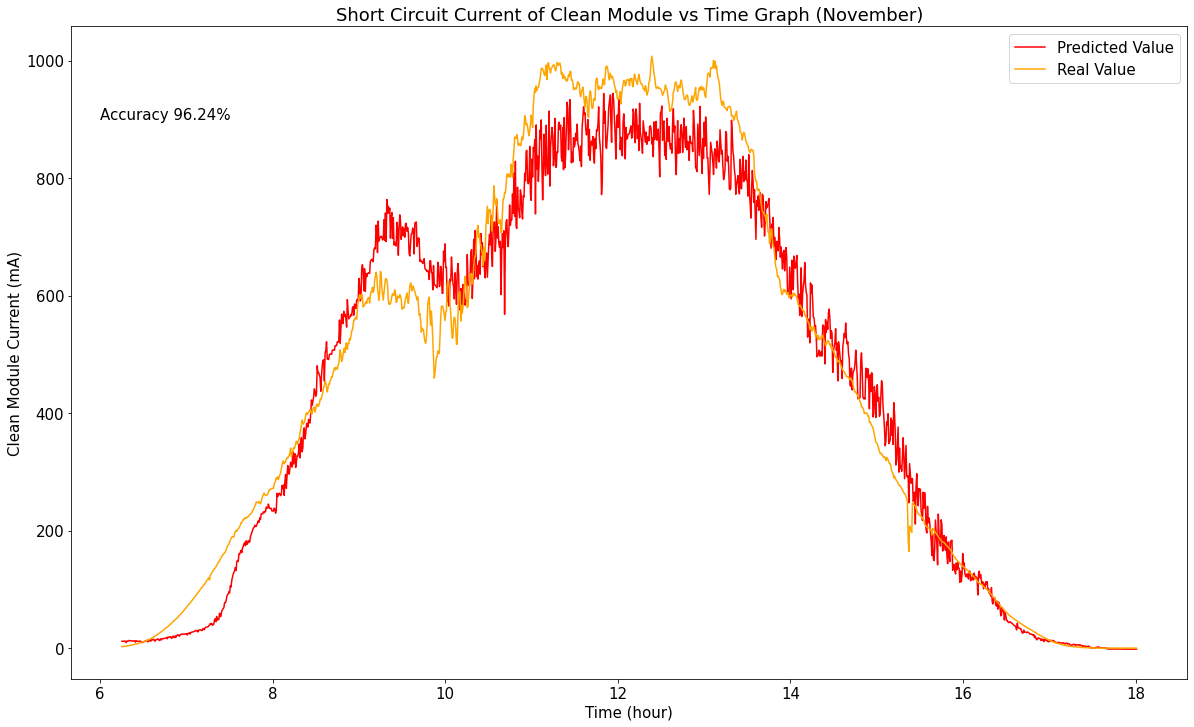

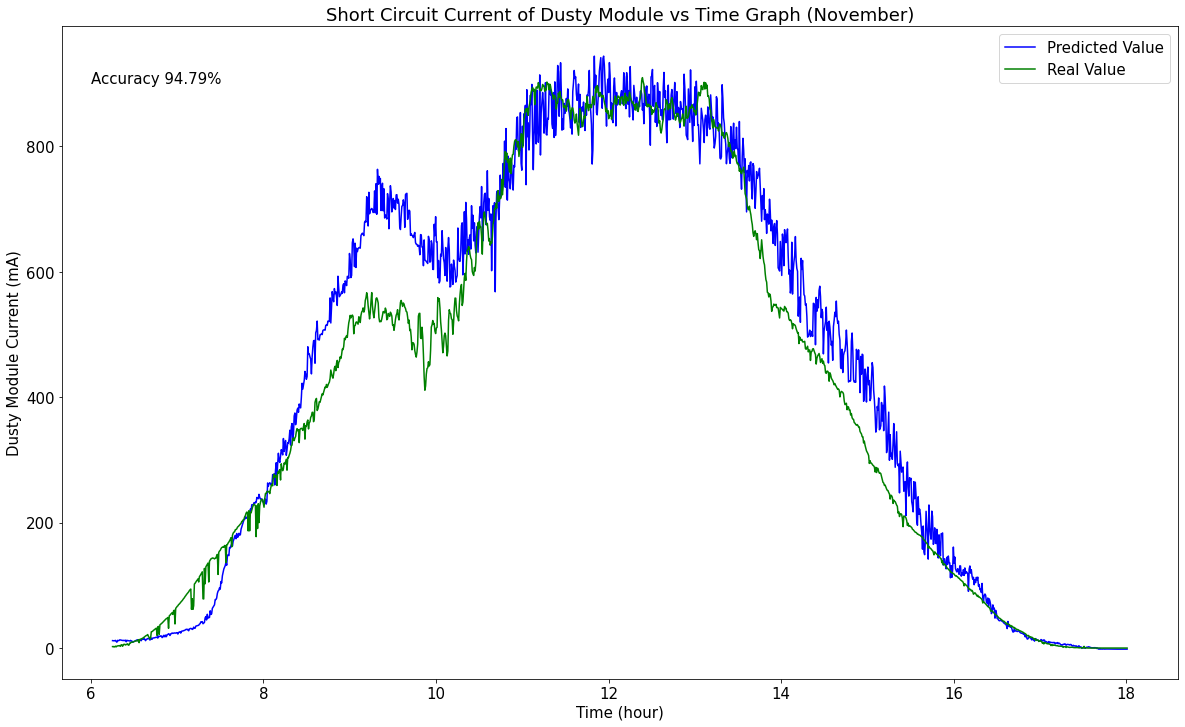

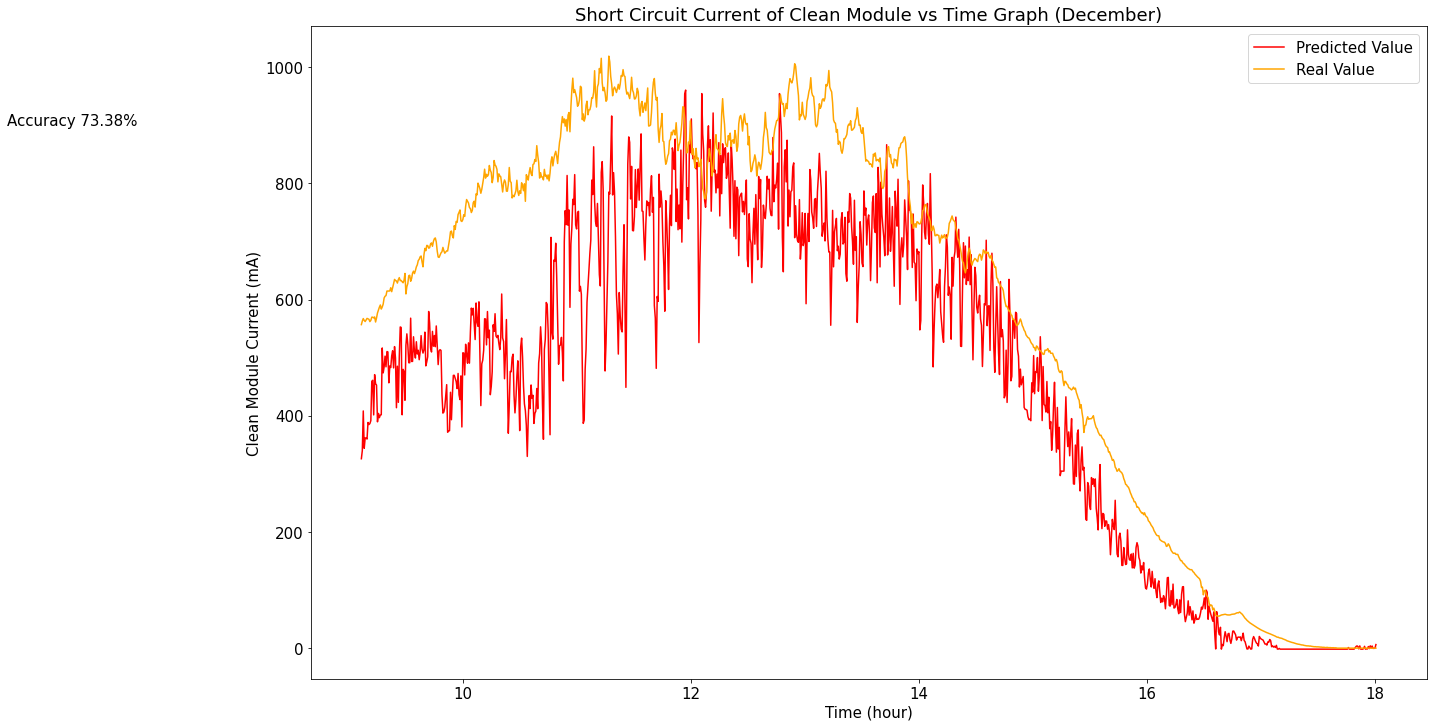

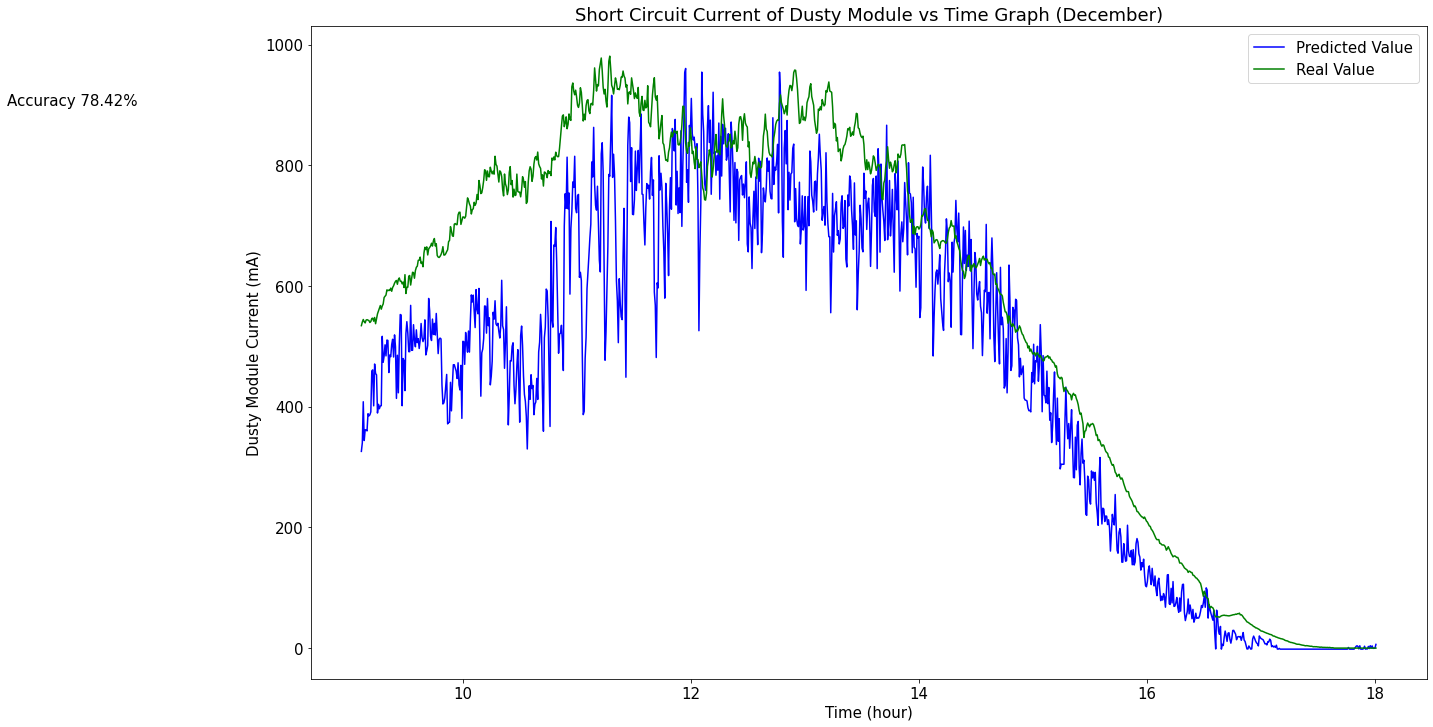

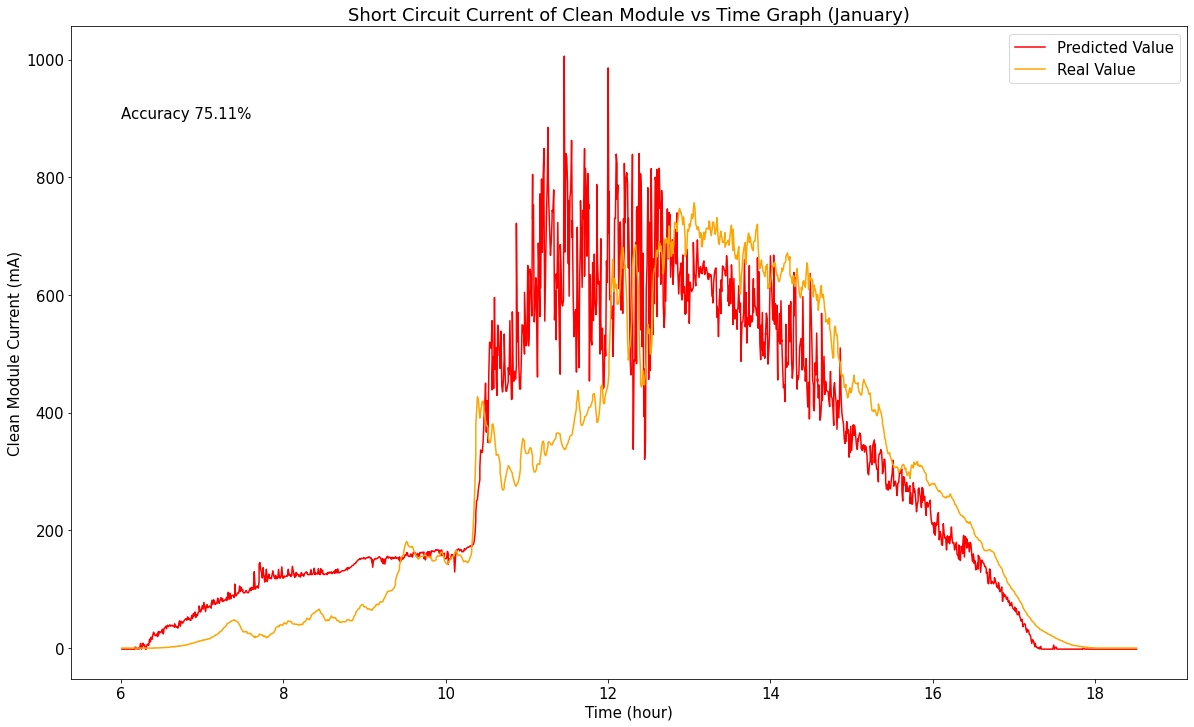

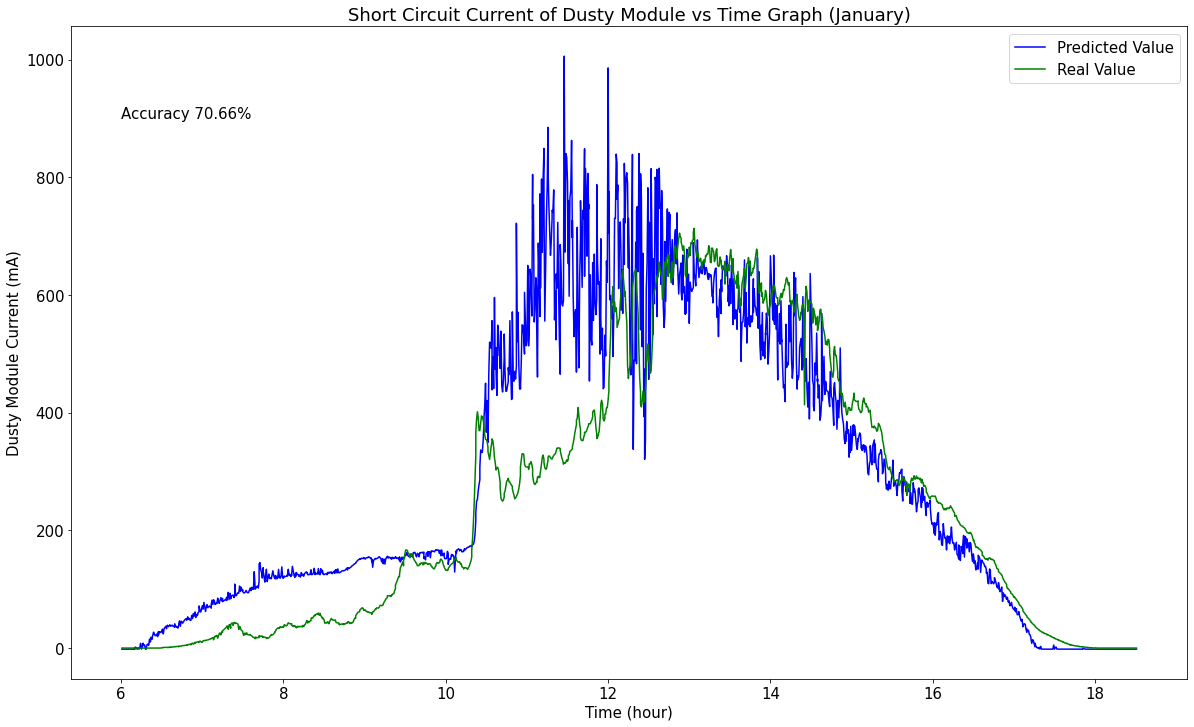

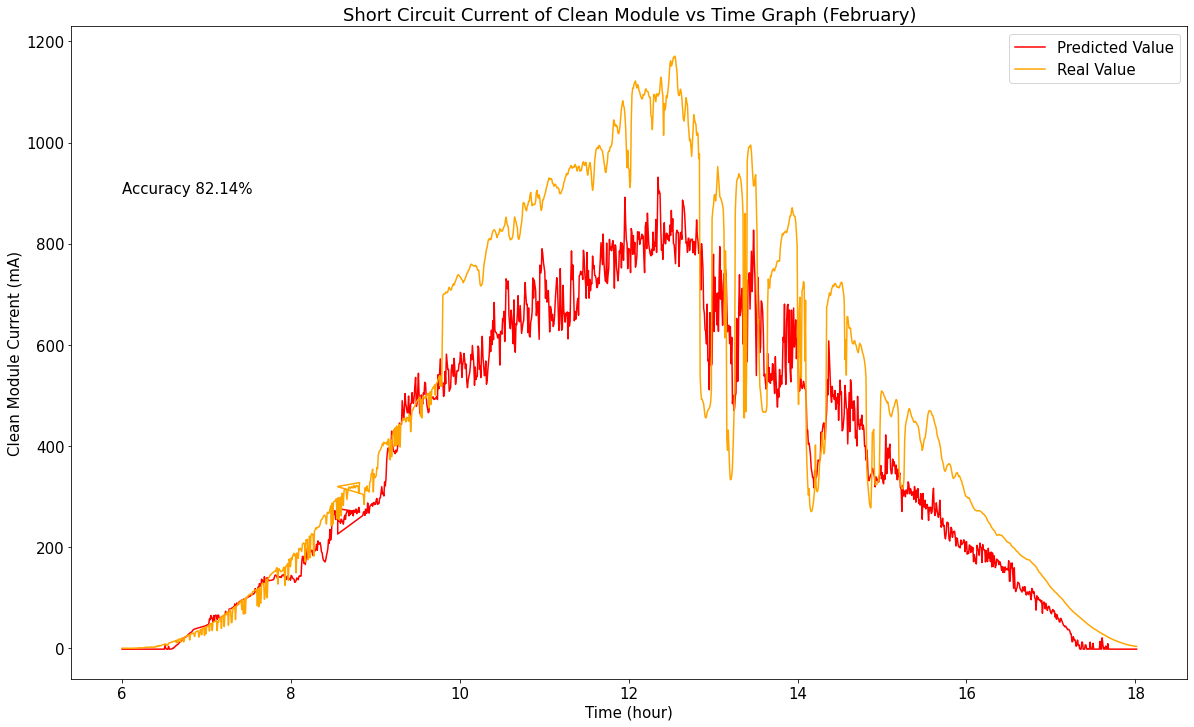

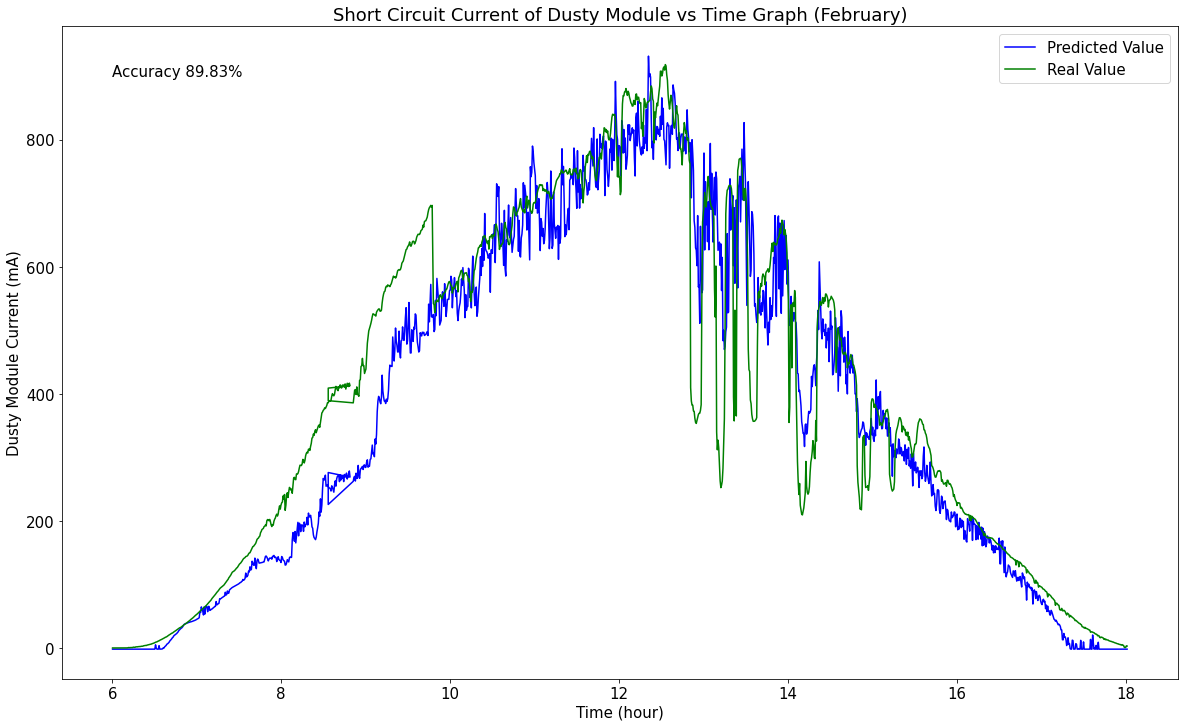

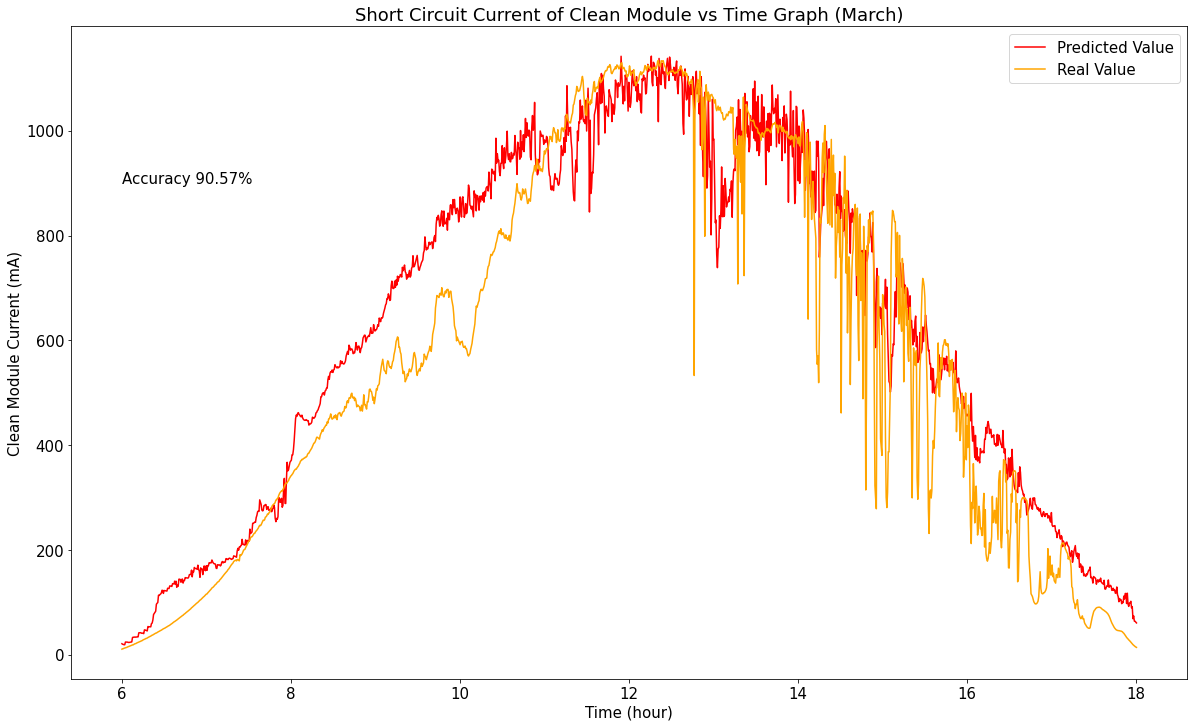

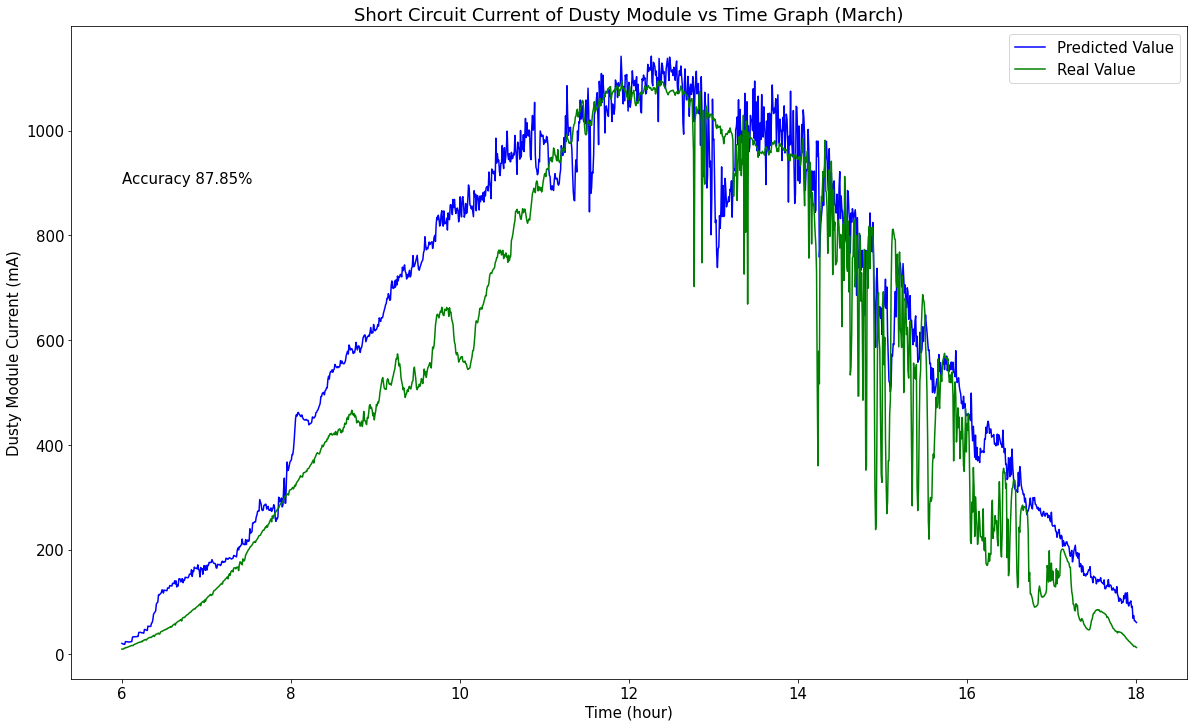

In [54]:
accuracy = {}
epochs = 100

for i in range(0,5):
  # Data Train-test split
  X_train = df_trains[i][['Clean Module Temperature (c)', 'Dusty Module Temperature (c)', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)', 'Tr (Hour)', 'T (Difference)']]
  y_train_clean = df_trains[i][['Clean Module Short Circuit Current (mA)']]
  y_train_dusty = df_trains[i][['Dusty Module Short Circuit Current (mA)']]

  X_test = df_tests[i][['Clean Module Temperature (c)', 'Dusty Module Temperature (c)', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)', 'Tr (Hour)', 'T (Difference)']]
  y_test_clean = df_tests[i][['Clean Module Short Circuit Current (mA)']]
  y_test_dusty = df_tests[i][['Dusty Module Short Circuit Current (mA)']]

  
  # model for data scaling
  scaler_mod_x = MinMaxScaler()
  scaler_mod_y_clean = MinMaxScaler()
  scaler_mod_y_dusty = MinMaxScaler()


  #Traning the model for data scale
  scaler_mod_x.fit(X_train)
  scaler_mod_y_clean.fit(y_train_clean)
  scaler_mod_y_dusty.fit(y_train_dusty)
  
 
   
  # reshaping data for Model
  X_train_transform = scaler_mod_x.transform(X_train)
  X_test_transform = scaler_mod_x.transform(X_test)


  '''y_train_transform_clean = scaler_mod_y_clean.transform(y_train_clean)
  y_train_transform_dusty = scaler_mod_y_dusty.transform(y_train_dusty)
  y_test_transform_clean = scaler_mod_y_clean.transform(y_test_clean)
  y_test_transform_dusty = scaler_mod_y_dusty.transform(y_test_dusty)'''
  
  y_train_transform_clean = y_train_clean
  y_train_transform_dusty = y_train_dusty
  y_test_transform_clean = y_test_clean
  y_test_transform_dusty = y_test_dusty

  month = file_names_train[i][0:len(file_names_train)-15]

  # Training Sequential Model
  sequential_model_clean.fit(
      X_train_transform,
      y_train_transform_clean,
      epochs = epochs,
      validation_data=(X_test_transform, y_test_transform_clean),
      batch_size=100
  )

  # Training Sequential Model
  sequential_model_dusty.fit(
      X_train_transform,
      y_train_transform_dusty,
      epochs = epochs,
      validation_data=(X_test_transform, y_test_transform_dusty),
      batch_size=100
  )

  y_pred_sequential_clean = sequential_model_clean.predict(X_test_transform)

  y_pred_sequential_dusty = sequential_model_dusty.predict(X_test_transform)


  #pred_value[month+'_clean'] = y_pred_sequential_clean
  #pred_value[month+'_dusty'] = y_pred_sequential_dusty

  accuracy_clean = r2_score(y_test_transform_clean, y_pred_sequential_clean)
  print('Accuracy of Clean Model:',month,str(accuracy_clean*100)+'%')
  accuracy[month+'_clean_'+str(i)] = accuracy_clean

  accuracy_dusty = r2_score(y_test_transform_dusty, y_pred_sequential_dusty)
  print('Accuracy of Dusty Model:',month,str(accuracy_dusty*100)+'%')
  accuracy[month+'_dusty_'+str(i)] = accuracy_dusty

  print('For Clean Model '+month)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_clean, y_pred_sequential_clean))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test_clean, y_pred_sequential_clean))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_clean, y_pred_sequential_clean)))

  print('For Dusty Model '+month)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dusty, y_pred_sequential_dusty))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test_dusty, y_pred_sequential_dusty))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dusty, y_pred_sequential_dusty)))
  
  time = X_test['Tr (Hour)'].values.tolist()
 
  plt.figure(figsize=(20,12))
  plt.rcParams.update({'font.size':15})
  plt.title('Short Circuit Current of Clean Module vs Time Graph ('+month+')')
  plt.xlabel("Time (hour)")
  plt.ylabel("Clean Module Current (mA)")
  plt.legend(['Accuracy '+str(round(accuracy_clean*100, 2))])
  p1 = plt.plot(time, y_pred_sequential_clean, "r", time, y_test_transform_clean, "orange")
  plt.legend(['Predicted Value', 'Real Value'], loc="upper right")
  plt.text(6,900, 'Accuracy '+str(round(accuracy_clean*100, 2))+'%')

  plt.savefig(drive_path+folder_path+'ANN_'+month+'_clean_'+str(i)+".png")
  
  plt.figure(figsize=(20,12))
  plt.rcParams.update({'font.size':15})
  plt.title('Short Circuit Current of Dusty Module vs Time Graph ('+month+')')
  plt.xlabel("Time (hour)")
  plt.ylabel("Dusty Module Current (mA)")
  p2 = plt.plot(time, y_pred_sequential_dusty, "b" ,  time, y_test_transform_dusty, "g")
  plt.legend(['Predicted Value', 'Real Value'], loc="upper right")
  plt.text(6,900, 'Accuracy '+str(round(accuracy_dusty*100, 2))+'%')

  plt.savefig(drive_path+folder_path+'ANN_'+month+'_dusty_'+str(i)+".png")

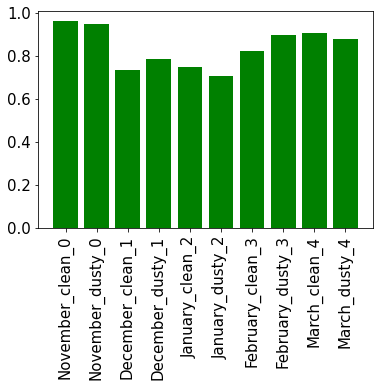

In [55]:
plt.bar(list(accuracy.keys()), accuracy.values(), color='g')
plt.xticks(rotation='vertical')
plt.show()

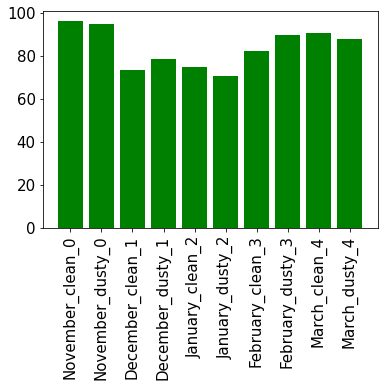

In [56]:
accuracy2 = accuracy
for i in accuracy2:
  accuracy2[i] = round(accuracy2[i]*100, 2)
plt.bar(list(accuracy2.keys()), accuracy2.values(), color='g')
plt.xticks(rotation='vertical')
plt.show()

In [57]:
import seaborn as sns

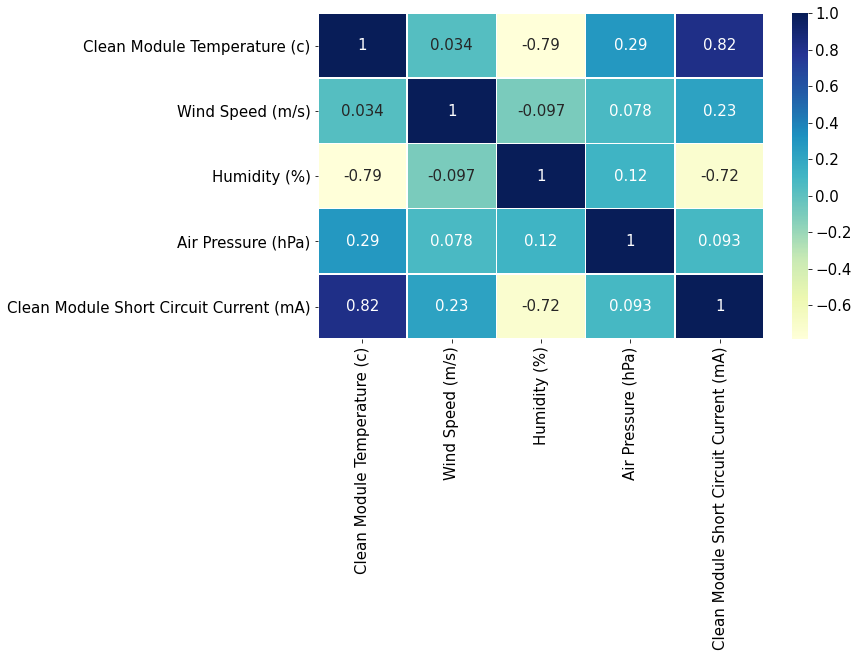

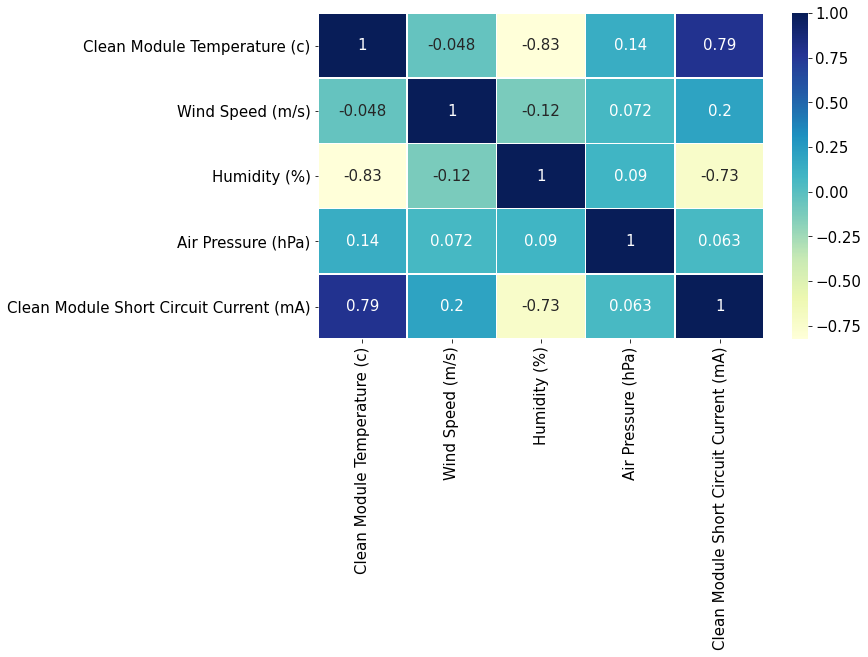

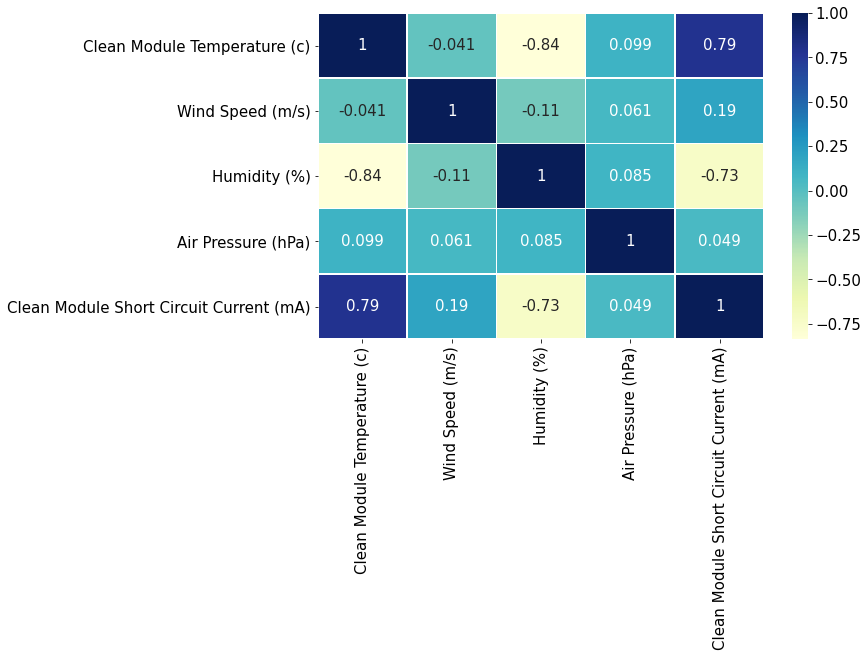

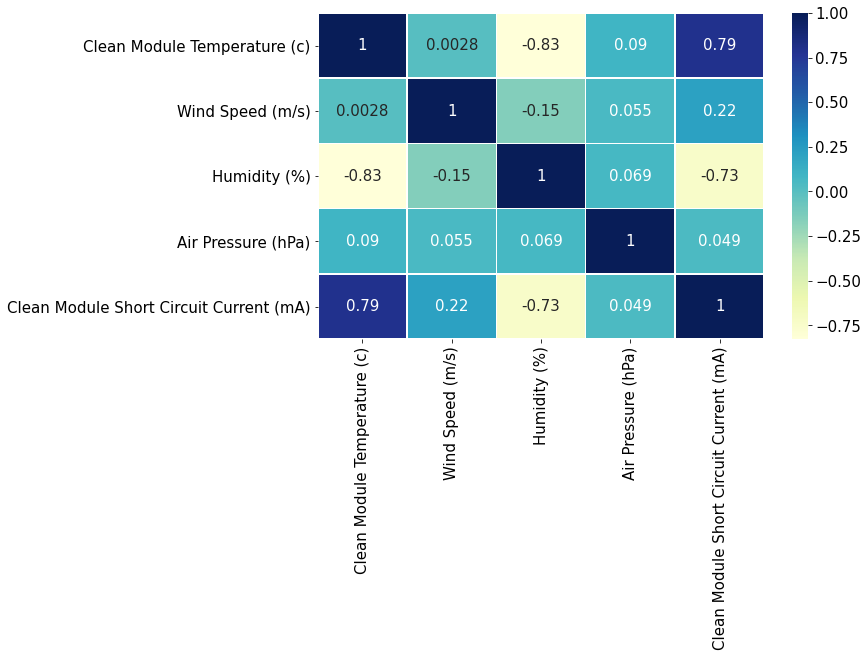

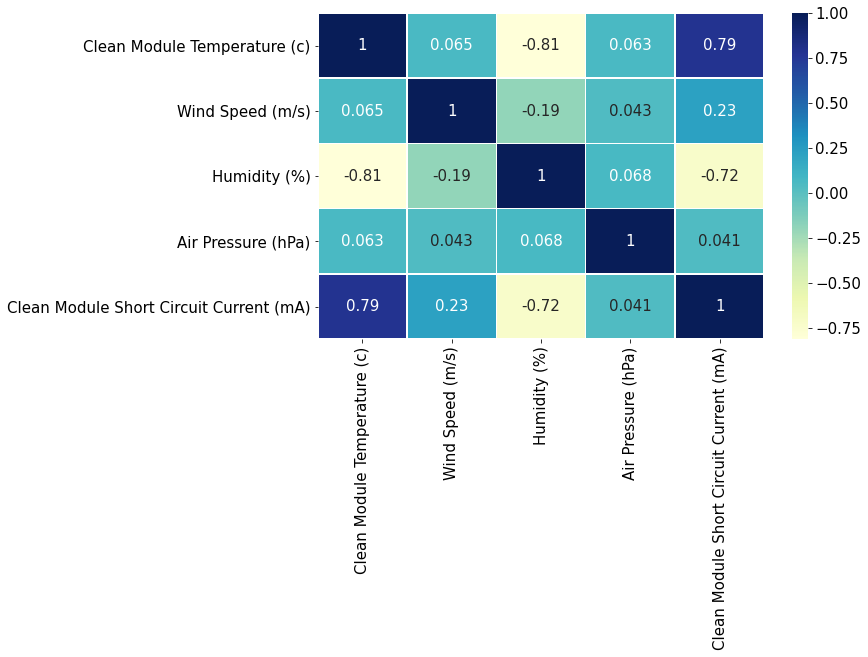

In [58]:
for df_train in df_trains:
  heat_map_1 = df_train[['Clean Module Temperature (c)', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)', 'Clean Module Short Circuit Current (mA)']]

  plt.figure(figsize=(10,6))
  sns.heatmap(heat_map_1.corr(), annot= True, linewidths=0.5, cmap = "YlGnBu")

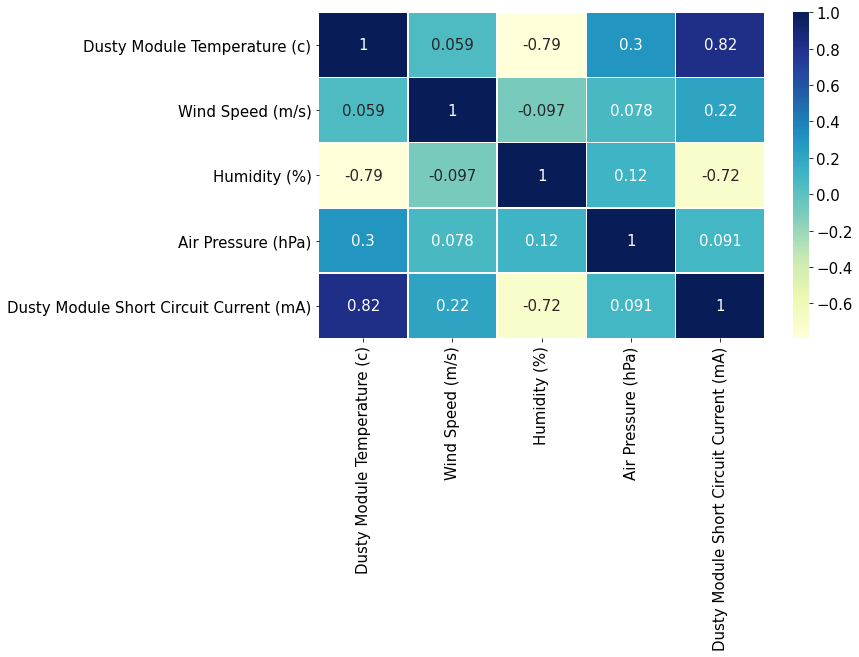

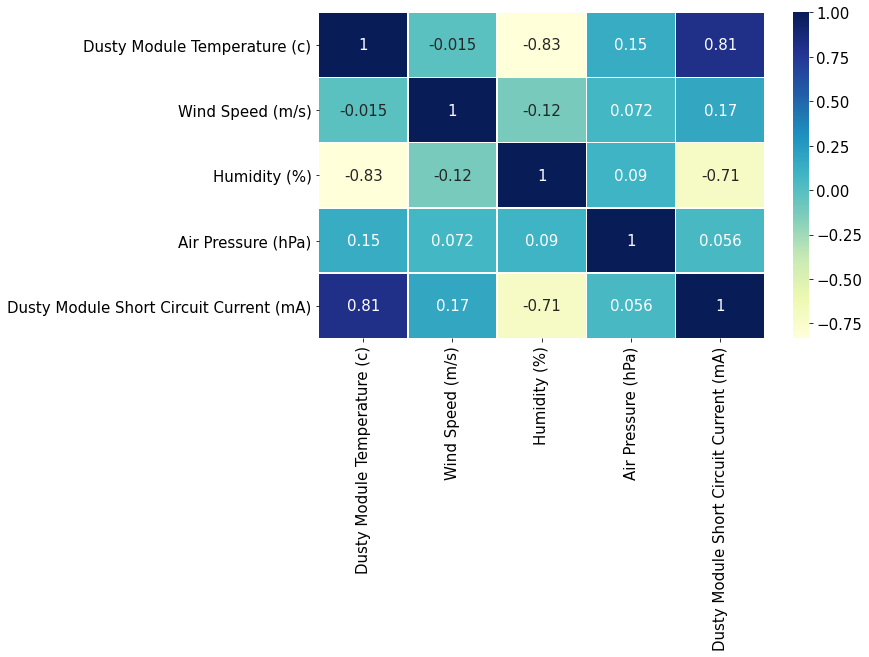

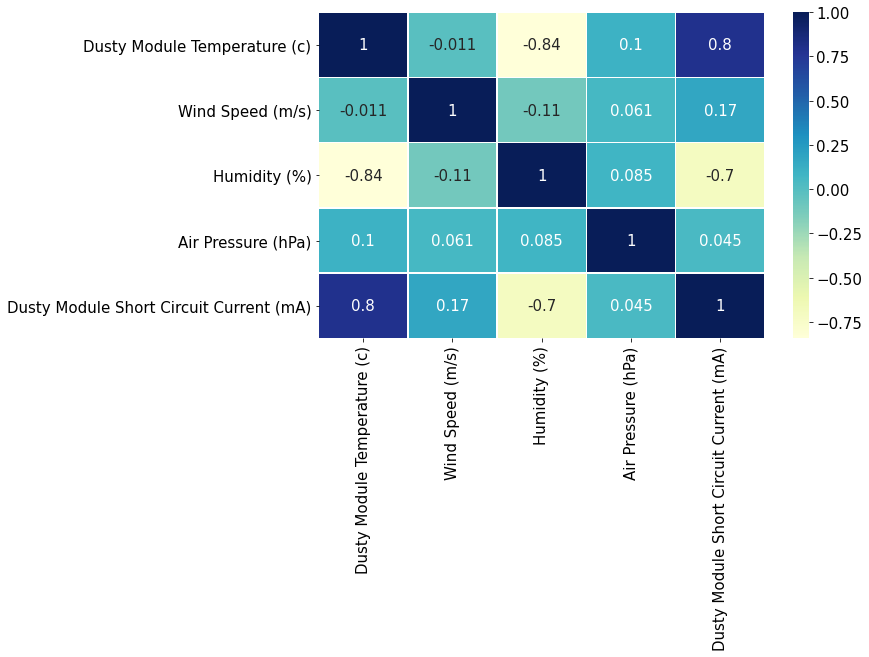

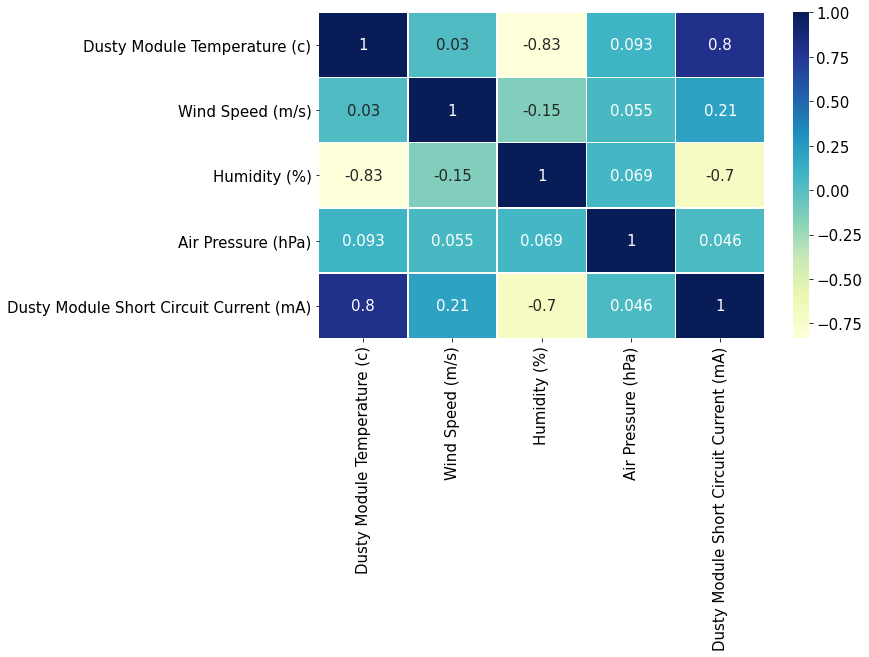

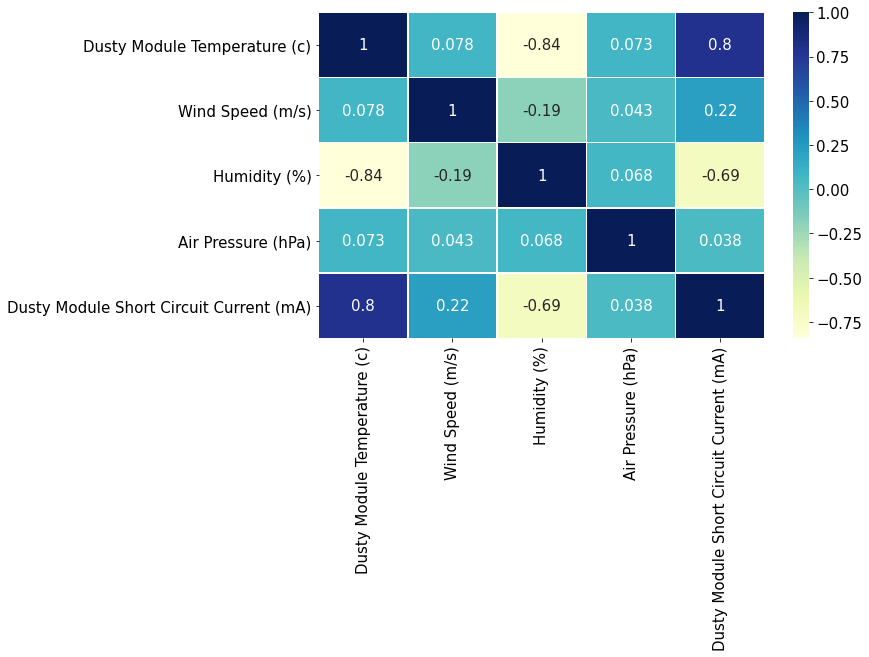

In [59]:
for df_train in df_trains:
  heat_map_2 = df_train[['Dusty Module Temperature (c)', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)', 'Dusty Module Short Circuit Current (mA)']]

  plt.figure(figsize=(10,6))
  sns.heatmap(heat_map_2.corr(), annot= True, linewidths=0.5, cmap = "YlGnBu")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


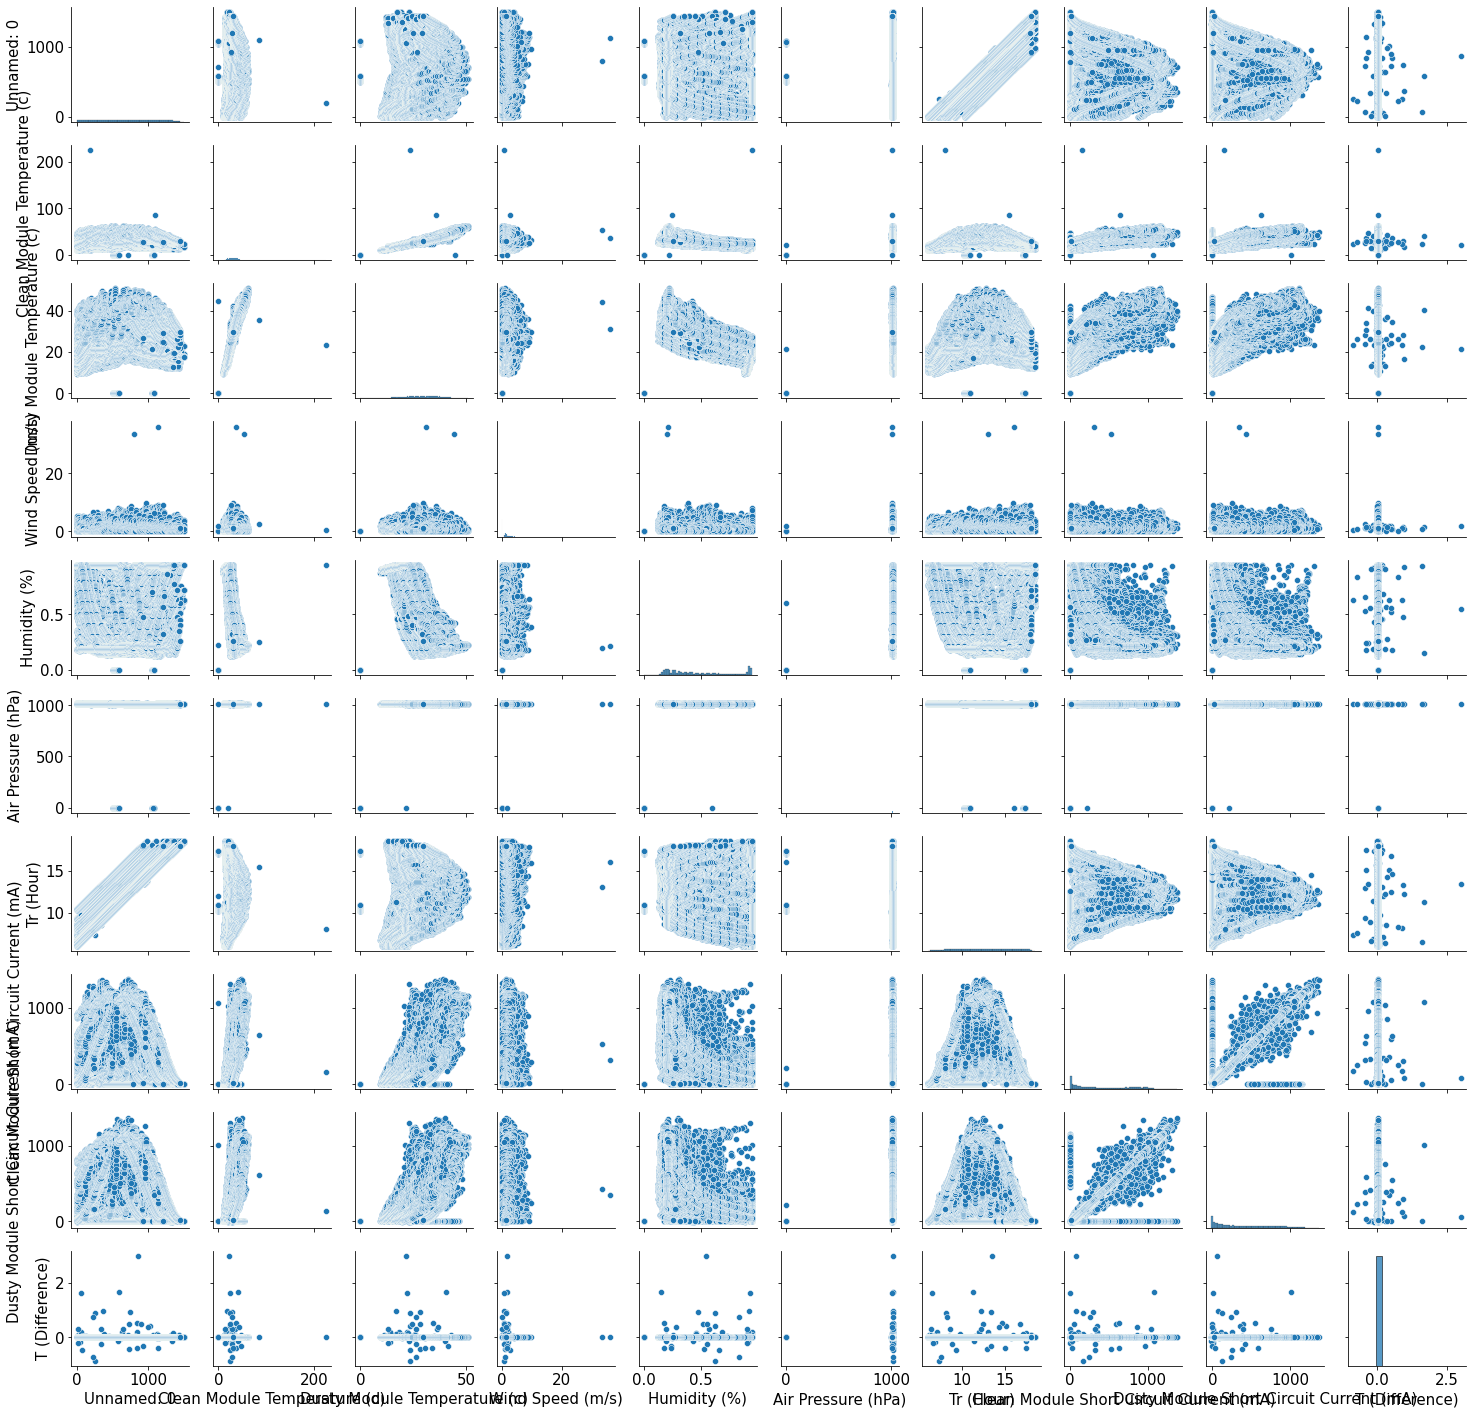

In [60]:
sns.pairplot(df_train)

In [61]:
drive_path = '/content/gdrive/My Drive/'
folder_path = 'ML/ALL/'

file_names_train_only = ['only_November_train.csv', 'only_December_train.csv', 'only_January_train.csv', 'only_February_train.csv', 'only_March_train.csv']
file_names_test_only = ['only_November_test.csv', 'only_December_test.csv', 'only_January_test.csv', 'only_February_test.csv', 'only_March_test.csv']

df_trains_only = []
df_tests_only = []

for i in range(0,5):
  df_train_only = pd.read_csv(drive_path+folder_path+file_names_train_only[i])
  df_test_only = pd.read_csv(drive_path+folder_path+file_names_test_only[i])
  
  df_trains_only.append(df_train_only)
  df_tests_only.append(df_test_only)

  print(df_train_only.shape)
  print(df_test_only.shape)
  


(27761, 10)
(1412, 16)
(29791, 10)
(1071, 16)
(35396, 10)
(1504, 16)
(24042, 10)
(1441, 16)
(28663, 10)
(1444, 12)


In [62]:
'''df_trains_only[0].describe()'''

'df_trains_only[0].describe()'

In [63]:
'''df_trains_only[1].describe()'''

'df_trains_only[1].describe()'

In [64]:
'''df_trains_only[2].describe()'''

'df_trains_only[2].describe()'

In [65]:
'''df_trains_only[3].describe()'''

'df_trains_only[3].describe()'

In [66]:
'''df_trains_only[4].describe()'''

'df_trains_only[4].describe()'

In [67]:
'''time = df_test['Tr (Hour)'].values.tolist()'''

"time = df_test['Tr (Hour)'].values.tolist()"

In [68]:
'''# Read CSV File from drive
import pandas as pd
 
drive_path = '/content/gdrive/My Drive/'
folder_path = 'ML/'
file_name_train = 'FULL DECEMBER TRAINING DATASET.csv'
file_name_test = '31ST DECEMBER TEST DATASET.csv'
df_train = pd.read_csv(drive_path+folder_path+file_name_train)
df_test = pd.read_csv(drive_path+folder_path+file_name_test)
print(df_test.shape)'''

"# Read CSV File from drive\nimport pandas as pd\n \ndrive_path = '/content/gdrive/My Drive/'\nfolder_path = 'ML/'\nfile_name_train = 'FULL DECEMBER TRAINING DATASET.csv'\nfile_name_test = '31ST DECEMBER TEST DATASET.csv'\ndf_train = pd.read_csv(drive_path+folder_path+file_name_train)\ndf_test = pd.read_csv(drive_path+folder_path+file_name_test)\nprint(df_test.shape)"

In [69]:
'''# Data Train-test
X_train = df_train[['Tr (Hour)', 'Clean Module Temperature ( C )', 'Dusty Module Temperature ( C )', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)']]
y_train_clean = df_train[['Clean Module Short Circuit Current (mA)']]
y_train_dusty = df_train[['Dusty Module Short Circuit Current (mA)']]
X_test = df_test[['Tr (Hour)', 'Clean Module Temperature ( C )', 'Dusty Module Temperature ( C )', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)']]
y_test_clean = df_test[['Clean Module Short Circuit Current (mA)']]
y_test_dusty = df_test[['Dusty Module Short Circuit Current (mA)']]
X_train.info()'''

"# Data Train-test\nX_train = df_train[['Tr (Hour)', 'Clean Module Temperature ( C )', 'Dusty Module Temperature ( C )', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)']]\ny_train_clean = df_train[['Clean Module Short Circuit Current (mA)']]\ny_train_dusty = df_train[['Dusty Module Short Circuit Current (mA)']]\nX_test = df_test[['Tr (Hour)', 'Clean Module Temperature ( C )', 'Dusty Module Temperature ( C )', 'Wind Speed (m/s)', 'Humidity (%)', 'Air Pressure (hPa)']]\ny_test_clean = df_test[['Clean Module Short Circuit Current (mA)']]\ny_test_dusty = df_test[['Dusty Module Short Circuit Current (mA)']]\nX_train.info()"

In [70]:
'''
# model for data scaling
scaler_mod_x = MinMaxScaler()
scaler_mod_y_clean = MinMaxScaler()
scaler_mod_y_dusty = MinMaxScaler()'''

'\n# model for data scaling\nscaler_mod_x = MinMaxScaler()\nscaler_mod_y_clean = MinMaxScaler()\nscaler_mod_y_dusty = MinMaxScaler()'

In [71]:
'''#Traning the model for data scale
scaler_mod_x.fit(X_train)
scaler_mod_y_clean.fit(y_train_clean)
scaler_mod_y_dusty.fit(y_train_dusty)'''

'#Traning the model for data scale\nscaler_mod_x.fit(X_train)\nscaler_mod_y_clean.fit(y_train_clean)\nscaler_mod_y_dusty.fit(y_train_dusty)'

In [72]:
'''# reshaping data for Model
X_train_transform = scaler_mod_x.transform(X_train)

y_train_transform_clean = scaler_mod_y_clean.transform(y_train_clean)
y_train_transform_dusty = scaler_mod_y_dusty.transform(y_train_dusty)

X_test_transform = scaler_mod_x.transform(X_test)

y_test_transform_clean = scaler_mod_y_clean.transform(y_test_clean)
y_test_transform_dusty = scaler_mod_y_dusty.transform(y_test_dusty)'''

'# reshaping data for Model\nX_train_transform = scaler_mod_x.transform(X_train)\n\ny_train_transform_clean = scaler_mod_y_clean.transform(y_train_clean)\ny_train_transform_dusty = scaler_mod_y_dusty.transform(y_train_dusty)\n\nX_test_transform = scaler_mod_x.transform(X_test)\n\ny_test_transform_clean = scaler_mod_y_clean.transform(y_test_clean)\ny_test_transform_dusty = scaler_mod_y_dusty.transform(y_test_dusty)'

In [73]:
'''y_test_transform_clean.shape'''

'y_test_transform_clean.shape'

In [74]:
'''sequential_model_clean = Sequential()
 
sequential_model_clean.add(Dense(6, activation='relu', input_dim=6))
sequential_model_clean.add(Dense(64, activation='linear'))
sequential_model_clean.add(Dropout(0.2))
sequential_model_clean.add(Dense(128, activation=LeakyReLU(alpha=0.05)))
sequential_model_clean.add(Dropout(0.2))
sequential_model_clean.add(Dense(1, activation='linear'))'''

"sequential_model_clean = Sequential()\n \nsequential_model_clean.add(Dense(6, activation='relu', input_dim=6))\nsequential_model_clean.add(Dense(64, activation='linear'))\nsequential_model_clean.add(Dropout(0.2))\nsequential_model_clean.add(Dense(128, activation=LeakyReLU(alpha=0.05)))\nsequential_model_clean.add(Dropout(0.2))\nsequential_model_clean.add(Dense(1, activation='linear'))"

In [75]:
'''# Compile Sequential Model
sequential_model_clean.compile(
    optimizer = 'rmsprop', #Adam(lr=0.00001
    loss = 'mse',
    metrics=['accuracy']
)'''

"# Compile Sequential Model\nsequential_model_clean.compile(\n    optimizer = 'rmsprop', #Adam(lr=0.00001\n    loss = 'mse',\n    metrics=['accuracy']\n)"

In [76]:
'''sequential_model_dusty = sequential_model_clean'''

'sequential_model_dusty = sequential_model_clean'

In [77]:
'''# Training Sequential Model
sequential_model_clean.fit(
    X_train_transform,
    y_train_transform_clean,
    epochs = 5000,
    validation_data=(X_test_transform, y_test_transform_clean),
    batch_size=100
)'''

'# Training Sequential Model\nsequential_model_clean.fit(\n    X_train_transform,\n    y_train_transform_clean,\n    epochs = 5000,\n    validation_data=(X_test_transform, y_test_transform_clean),\n    batch_size=100\n)'

In [78]:
'''# Training Sequential Model
sequential_model_dusty.fit(
    X_train_transform,
    y_train_transform_dusty,
    epochs = 5000,
    validation_data=(X_test_transform, y_test_transform_dusty),
    batch_size=100
)'''

'# Training Sequential Model\nsequential_model_dusty.fit(\n    X_train_transform,\n    y_train_transform_dusty,\n    epochs = 5000,\n    validation_data=(X_test_transform, y_test_transform_dusty),\n    batch_size=100\n)'

In [79]:
'''print('History of Clean Module Model Training')
plt.rcParams.update({'font.size':10})
loss_accuracy_df = pd.DataFrame(sequential_model_clean.history.history)
loss_accuracy_df.plot()'''

"print('History of Clean Module Model Training')\nplt.rcParams.update({'font.size':10})\nloss_accuracy_df = pd.DataFrame(sequential_model_clean.history.history)\nloss_accuracy_df.plot()"

In [80]:
'''print('History of Dusty Module Model Training')
plt.rcParams.update({'font.size':10})
loss_accuracy_df = pd.DataFrame(sequential_model_dusty.history.history)
loss_accuracy_df.plot()'''

"print('History of Dusty Module Model Training')\nplt.rcParams.update({'font.size':10})\nloss_accuracy_df = pd.DataFrame(sequential_model_dusty.history.history)\nloss_accuracy_df.plot()"

In [81]:
'''y_pred_sequential_clean = sequential_model_clean.predict(X_test_transform)'''

'y_pred_sequential_clean = sequential_model_clean.predict(X_test_transform)'

In [82]:
'''y_pred_sequential_dusty = sequential_model_dusty.predict(X_test_transform)'''

'y_pred_sequential_dusty = sequential_model_dusty.predict(X_test_transform)'

In [83]:
'''from sklearn.metrics import r2_score
accuracy_clean = r2_score(y_test_transform_clean, y_pred_sequential_clean)
print('Accuracy of Clean Model:',str(accuracy_clean*100)+'%')
'''

"from sklearn.metrics import r2_score\naccuracy_clean = r2_score(y_test_transform_clean, y_pred_sequential_clean)\nprint('Accuracy of Clean Model:',str(accuracy_clean*100)+'%')\n"

In [84]:
'''accuracy_dusty = r2_score(y_test_transform_dusty, y_pred_sequential_dusty)
print('Accuracy of Dusty Model:',str(accuracy_dusty*100)+'%')
'''

"accuracy_dusty = r2_score(y_test_transform_dusty, y_pred_sequential_dusty)\nprint('Accuracy of Dusty Model:',str(accuracy_dusty*100)+'%')\n"

In [85]:
'''from sklearn import metrics
import numpy as np
print('For Clean Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_clean, y_pred_sequential_clean))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_clean, y_pred_sequential_clean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_clean, y_pred_sequential_clean)))'''

"from sklearn import metrics\nimport numpy as np\nprint('For Clean Model')\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test_clean, y_pred_sequential_clean))\nprint('Mean Squared Error:', metrics.mean_squared_error(y_test_clean, y_pred_sequential_clean))\nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_clean, y_pred_sequential_clean)))"

In [86]:
'''print('For Dusty Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dusty, y_pred_sequential_dusty))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dusty, y_pred_sequential_dusty))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dusty, y_pred_sequential_dusty)))'''

"print('For Dusty Model')\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dusty, y_pred_sequential_dusty))\nprint('Mean Squared Error:', metrics.mean_squared_error(y_test_dusty, y_pred_sequential_dusty))\nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dusty, y_pred_sequential_dusty)))"

In [87]:
'''from matplotlib import pyplot as plt

time = df_test['Tr (Hour)'].values.tolist()
 
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size':15})
plt.title('Short Circuit Current of Clean Module vs Time Grpah')
plt.xlabel("Time (hour)")
plt.ylabel("Clean Module Current (mA)")
p1 = plt.plot(time, y_pred_sequential_clean, "r", time, y_test_transform_clean, "orange")'''

'from matplotlib import pyplot as plt\n\ntime = df_test[\'Tr (Hour)\'].values.tolist()\n \nplt.figure(figsize=(20,12))\nplt.rcParams.update({\'font.size\':15})\nplt.title(\'Short Circuit Current of Clean Module vs Time Grpah\')\nplt.xlabel("Time (hour)")\nplt.ylabel("Clean Module Current (mA)")\np1 = plt.plot(time, y_pred_sequential_clean, "r", time, y_test_transform_clean, "orange")'

In [88]:
'''time = df_test['Tr (Hour)'].values.tolist()
 
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size':15})
plt.title('Short Circuit Current of Dusty Module vs Time Grpah')
plt.xlabel("Time (hour)")
plt.ylabel("Dusty Module Current (mA)")
p1 = plt.plot(time, y_pred_sequential_dusty, "b", time, y_test_transform_dusty, "g")'''

'time = df_test[\'Tr (Hour)\'].values.tolist()\n \nplt.figure(figsize=(20,12))\nplt.rcParams.update({\'font.size\':15})\nplt.title(\'Short Circuit Current of Dusty Module vs Time Grpah\')\nplt.xlabel("Time (hour)")\nplt.ylabel("Dusty Module Current (mA)")\np1 = plt.plot(time, y_pred_sequential_dusty, "b", time, y_test_transform_dusty, "g")'